In [27]:
import pickle as pkl
import csv
import re
import yaml
import os
import xml.etree.ElementTree as ET
from tqdm import tqdm
from collections import Counter
import matplotlib.pyplot as plt

In [28]:
global CFG
with open("../../config.yaml", "r") as ymlfile:
    CFG = yaml.load(ymlfile, Loader=yaml.SafeLoader)
data_dir = CFG["datadir"]

In [29]:
papers = []
papers_data = os.path.join(data_dir, "cora/papers")
with open(papers_data, 'r') as f:
    for line in f:
        papers.append(line.split('\t'))

In [30]:
classif = []
classif_data = os.path.join(data_dir, "cora/classifications")
with open(classif_data, 'r') as f:
    for line in f:
        classif.append(line.split('\t'))

In [31]:
classif[0]

['http:##www.isi.edu#sims#papers#94-sims-agents.ps',
 '/Information_Retrieval/Retrieval/\n']

In [32]:
papers_lookup = {}
for item in papers:
    papers_lookup[item[1]] = {"id": item[0], "desc": item[-1]}

In [ ]:
papers_dict = {}

for item in classif:
    if item[0] in papers_lookup.keys():
        papers_dict[papers_lookup[item[0]]["id"]] = {"filename": item[0],
                                                    "class": item[1]}
        tokens = re.findall("\<\w*\>", papers_lookup[item[0]]["desc"])
        for tok in tokens:
            tmp = tok.split('<')
            tmp2 = tmp[-1].split('>')
            papers_dict[papers_lookup[item[0]]["id"]][tmp2[0]] = re.findall("\<"+tmp2[0]+"\>(.*)\<\/"+tmp2[0]+">", papers_lookup[item[0]]["desc"])[0]
for k in tqdm(papers_dict.keys()):
    with open(os.path.join(data_dir, "cora/extractions/" + papers_dict[k]["filename"]), 'r') as f:
        info = f.read()
        if "Abstract-found: 1" in info.split("\n"):
            for item in info.split("\n"):
                handle = item.split(':')[0]
                papers_dict[k][handle] = ' '.join(item.split(':')[1:])            
    

 76%|███████▋  | 21688/28415 [01:57<00:20, 330.13it/s]

In [43]:
with open(os.path.join(data_dir, "classifed_papers.pkl"), 'wb') as f:
    pkl.dump(papers_dict, f)

In [41]:
tmp2

['pages', '']

In [40]:
papers_lookup[item[0]]

KeyError: ''

In [114]:
files = os.listdir(os.path.join(data_dir, "cora/extractions"))

In [144]:
counter = 0
for k in tqdm(papers_dict.keys()):
    with open(os.path.join(data_dir, "cora/extractions/" + papers_dict[k]["filename"]), 'r') as f:
        info = f.read()
        if "Abstract-found: 1" in info.split("\n"):
            for item in info.split("\n"):
                handle = item.split(':')[0]
                papers_dict[k][handle] = ' '.join(item.split(':')[1:])


100%|██████████| 28415/28415 [00:02<00:00, 10072.93it/s]


In [159]:
class_mapping

{0: '/Artificial_Intelligence/Agents/\n',
 1: '/Artificial_Intelligence/Data_Mining/\n',
 2: '/Artificial_Intelligence/Expert_Systems/\n',
 3: '/Artificial_Intelligence/Games_and_Search/\n',
 4: '/Artificial_Intelligence/Knowledge_Representation/\n',
 5: '/Artificial_Intelligence/Machine_Learning/Case-Based/\n',
 6: '/Artificial_Intelligence/Machine_Learning/Genetic_Algorithms/\n',
 7: '/Artificial_Intelligence/Machine_Learning/Neural_Networks/\n',
 8: '/Artificial_Intelligence/Machine_Learning/Probabilistic_Methods/\n',
 9: '/Artificial_Intelligence/Machine_Learning/Reinforcement_Learning/\n',
 10: '/Artificial_Intelligence/Machine_Learning/Rule_Learning/\n',
 11: '/Artificial_Intelligence/Machine_Learning/Theory/\n',
 12: '/Artificial_Intelligence/NLP/\n',
 13: '/Artificial_Intelligence/Planning/\n',
 14: '/Artificial_Intelligence/Robotics/\n',
 15: '/Artificial_Intelligence/Speech/\n',
 16: '/Artificial_Intelligence/Theorem_Proving/\n',
 17: '/Artificial_Intelligence/Vision_and_Patt

In [8]:
with open(os.path.join(data_dir, "classifed_papers.pkl"), 'rb') as f:
    papers_dict = pkl.load(f)


In [9]:
classes = Counter()
all_classes = []
for k in papers_dict.keys():
    all_classes.append(papers_dict[k]["class"])
    classes[papers_dict[k]["class"]] += 1

In [10]:
class_mapping = {k: v for k, v in enumerate(sorted(classes.keys()))}

In [26]:
classes.most_common(len(classes))

[('/Artificial_Intelligence/Machine_Learning/Neural_Networks/\n', 1386),
 ('/Artificial_Intelligence/Vision_and_Pattern_Recognition/\n', 1238),
 ('/Artificial_Intelligence/Robotics/\n', 963),
 ('/Operating_Systems/Memory_Management/\n', 959),
 ('/Operating_Systems/Distributed/\n', 898),
 ('/Human_Computer_Interaction/Graphics_and_Virtual_Reality/\n', 896),
 ('/Programming/Compiler_Design/\n', 818),
 ('/Programming/Software_Development/\n', 793),
 ('/Artificial_Intelligence/Agents/\n', 779),
 ('/Artificial_Intelligence/Planning/\n', 745),
 ('/Data_Structures__Algorithms_and_Theory/Computational_Complexity/\n', 681),
 ('/Networking/Protocols/\n', 677),
 ('/Artificial_Intelligence/Machine_Learning/Probabilistic_Methods/\n', 654),
 ('/Artificial_Intelligence/Machine_Learning/Genetic_Algorithms/\n', 624),
 ('/Artificial_Intelligence/Games_and_Search/\n', 601),
 ('/Data_Structures__Algorithms_and_Theory/Parallel/\n', 559),
 ('/Artificial_Intelligence/NLP/\n', 540),
 ('/Artificial_Intelligenc

<BarContainer object of 70 artists>

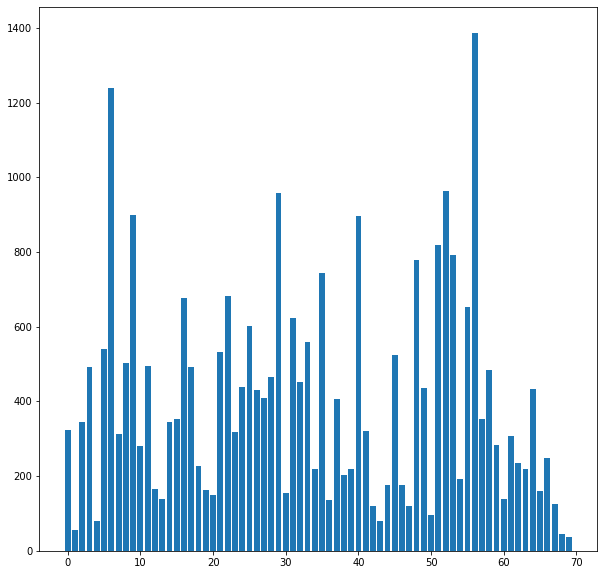

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))

ax.bar(range(len(classes)), classes.values())

AttributeError: 'Counter' object has no attribute 'min'